In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_excel('Online Retail.xlsx')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
print("Amount of rows: ", df.shape[0])
print(df.isnull().sum())

Amount of rows:  541909
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# drop unnecessary columns
df = df.drop(['InvoiceNo', 'StockCode', 'Description', 'Country'], axis=1)

df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID
0,6,2010-12-01 08:26:00,2.55,17850.0
1,6,2010-12-01 08:26:00,3.39,17850.0
2,8,2010-12-01 08:26:00,2.75,17850.0
3,6,2010-12-01 08:26:00,3.39,17850.0
4,6,2010-12-01 08:26:00,3.39,17850.0


In [ ]:
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

df.head()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSpend
0,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,6,2010-12-01 08:26:00,3.39,17850.0,20.34


In [ ]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract features from the datetime column
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Month'] = df['InvoiceDate'].dt.month
df['Hour'] = df['InvoiceDate'].dt.hour


In [ ]:
# Select features for clustering
X = df[['Quantity', 'UnitPrice', 'TotalSpend', 'DayOfWeek', 'Month', 'Hour']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df.head(10)

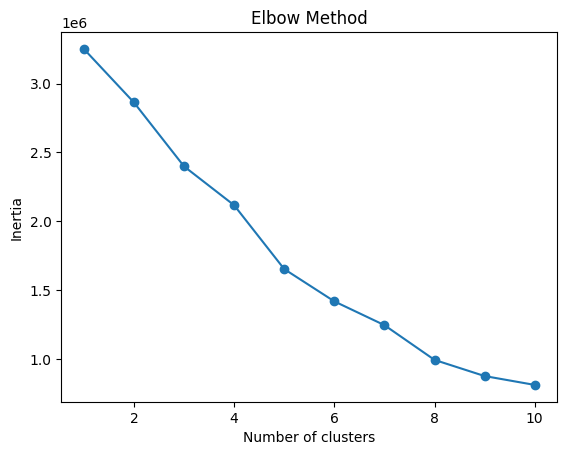

In [ ]:
inertia_values = []
for k in range(1, 11):  # Trying k values from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# View the resulting clusters
print(df[['CustomerID', 'Cluster']].head(20))


    CustomerID  Cluster
0      17850.0        0
1      17850.0        0
2      17850.0        0
3      17850.0        0
4      17850.0        0
5      17850.0        0
6      17850.0        0
7      17850.0        0
8      17850.0        0
9      13047.0        0
10     13047.0        0
11     13047.0        0
12     13047.0        0
13     13047.0        0
14     13047.0        0
15     13047.0        0
16     13047.0        0
17     13047.0        0
18     13047.0        0
19     13047.0        0


In [ ]:
# plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(df['TotalSpend'], df['Quantity'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Total Spend')
plt.ylabel('Quantity')
plt.title('Total Spend vs Quantity')
plt.show()